### Tanmay Bhatt
### 011499072
CMPE 258 <br />
Mid term exam - 2 <br />
Date: 04/15/2018 <br />

## Best accuracy achieved with Learning rate = 0.04 and Dropout 0.8

dropout probability :  0.5 <br />
Learning rate :  0.004 <br />
<br />
Final cost : 0.05231717 <br/>

Training accuracy : 99.21% <br />
Testing accuracy : 95%

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.set_random_seed(10)

## 1. (10pts) Define functions
You may need to define the following functions. <br />
One-hot encoding<br />
Create placeholders<br />
initialize parameters<br />
forward propagation with regularization<br />
compute cost<br />

In [2]:
def zero_pad(X,p):
    return np.pad(X, [(0,0), (p,p), (p,p), (0,0)], 'constant', constant_values=(0))

In [3]:
def placeholder_initializer():
    X = tf.placeholder(shape=(None, 66, 66, 3), dtype=tf.float32) 
    Y = tf.placeholder(shape=(None, output_neurons), dtype=tf.float32)
    dropout_probaility = tf.placeholder("float")

    return X,Y,dropout_probaility

In [4]:
def parameters_initializer():
    W_cn_1 = tf.get_variable("W_cn_1", shape=(4,4,3,8), initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W_cn_2 = tf.get_variable("W_cn_2", shape=(4,4,8,16), initializer=tf.contrib.layers.xavier_initializer(seed=0))
    
    
#     B_cn_1 = tf.get_variable("B_cn_1",shape=(1,1,1,8),initializer=tf.zeros_initializer(),dtype=tf.float32)
#     B_cn_2 = tf.get_variable("B_cn_2",shape=(1,1,1,8),initializer=tf.zeros_initializer(),dtype=tf.float32)
    
    W1 = tf.get_variable("W_fc_1",shape=(input_neurons, hidden1_neurons),dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable("W_fc_2",shape=(hidden1_neurons,output_neurons),dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())

    B1 = tf.get_variable("B_fc_1",shape=(hidden1_neurons),initializer=tf.zeros_initializer(),dtype=tf.float32)
    B2 = tf.get_variable("B_fc_3",shape=(output_neurons),initializer=tf.zeros_initializer(),dtype=tf.float32)
    
    
    return W_cn_1,W_cn_2, W1, W2, B1, B2

In [5]:
def one_hot_encoding(mat):
    list_of_list = []
    for i in range(0,len(mat)):
        small_list = np.zeros(np.max(mat)+1)
        small_list[mat[i]] = 1
        list_of_list.append(small_list)
    result = np.array(list_of_list)
    return result

In [6]:
def forward_pass(dropout_prob):
    
    global neural_dict
    
    Z1 = tf.nn.conv2d(
        X,
        neural_dict['Conv1']['W'],
        neural_dict['Conv1']['params']['stride'],
        padding="SAME"
    )
    
    A1 = tf.nn.relu(Z1)
    print("A1 shape : ", A1.shape)
    
    P1 = tf.nn.max_pool(
        value = A1,
        ksize = neural_dict['Pool1']['params']['f'],
        strides = neural_dict['Pool1']['params']['stride'],
        padding = "SAME"
    )
    print("P1 shape : ", P1.shape)
    
    Z2 = tf.nn.conv2d(
        P1,
        neural_dict['Conv2']['W'],
        neural_dict['Conv2']['params']['stride'],
        padding = 'SAME'
    )
    
    A2 = tf.nn.relu(Z2)
    print("A2 shape : ", A2.shape)    
    
    P2 = tf.nn.avg_pool(
        value = A2,
        ksize = neural_dict['Pool2']['params']['f'],
        strides = neural_dict['Pool2']['params']['stride'],
        padding = 'SAME'
    )
    print("P2 shape : ", P2.shape)
    
    
    F1 = tf.layers.flatten(inputs = P2)
    print("F1 shape : ", F1.shape)
    
        
    fz_1 = tf.add(tf.matmul(F1, neural_dict['Fc1']['W']), neural_dict['Fc1']['B'])
    fa_1 = tf.nn.relu(fz_1)
    
    fa_1 = tf.nn.dropout(fa_1, dropout_prob)
    print("fa_1 shape : ", fa_1.shape)
    
    
    fz_2 = tf.add(tf.matmul(fa_1, neural_dict['Fc2']['W']), neural_dict['Fc2']['B'])
    fa_2 = tf.sigmoid(fz_2)
    
    return fz_2
    

## 2. Load data
Using Jupyter notebook, load the data.

In [7]:
X_train = np.load("./exam2_train_x.npy")
Y_train = np.load("./exam2_train_y.npy")
X_test = np.load("./exam2_test_x.npy")
Y_test = np.load("./exam2_test_y.npy")
print ('Train x shape :', X_train.shape)
print ('Train y shape :', Y_train.shape)

print ('Test x shape :', X_test.shape)
print ('Test y shape :', Y_test.shape)

Train x shape : (1020, 64, 64, 3)
Train y shape : (1020,)
Test x shape : (180, 64, 64, 3)
Test y shape : (180,)


In [8]:
X_train = X_train/255 - 0.5
X_test = X_test/255 - 0.5

In [9]:
Y_train_one_hot = one_hot_encoding(Y_train)
Y_test_one_hot = one_hot_encoding(Y_test)

In [10]:
X_train = zero_pad(X_train, 1)
X_test = zero_pad(X_test, 1)

In [11]:
input_neurons = 4624
hidden1_neurons = 108
output_neurons = 6

In [12]:
X,Y, dropout_prob = placeholder_initializer()

In [13]:
neural_dict = {
    
    'Conv1':{
        'params' : {
            'padding' : 1,
            'stride' : [1,2,2,1]
        }
    },
    'Pool1' : {
        'params' : {
            'f' : [1, 5, 5, 1],
            'stride' : [1,1,1,1]
        }
    },
    'Conv2' : {
        'params' : {
            'padding' : 0,
            'stride' : [1,2,2,1]
        }
    },
    'Pool2' : {
        'params' : {
            'f' : [1, 5, 5, 1],
            'stride' : [1,1,1,1]
        }
    },
    'Fc1' : {
    },
    'Fc2' : {
    }
}

## 3. (10pts) Initialize parameters (Weights, bias for each layer)
Please initialize weight coefficients and bias terms for each layer. Please make sure the size (dimension) of each Weights and bias.
Please consider optimum initialization method depending on Activation function.

##  Initializing weights and biases
Note : No need to initialize biases for Convolutional layers as tf.nn automatically takes care of it.

In [14]:
neural_dict['Conv1']['W'], neural_dict['Conv2']['W'], neural_dict['Fc1']['W'], neural_dict['Fc2']['W'], neural_dict['Fc1']['B'], neural_dict['Fc2']['B'] = parameters_initializer()

Instructions for updating:
Use the retry module or similar alternatives.


In [15]:
plot_object = {}

### Hyper parameters

In [16]:
dropout_probabilities = [0.3, 0.5, 0.8, 0.9, 1]
rate = 0.004
iterations = 100

In [17]:
tf.set_random_seed(10)
forward_result = forward_pass(dropout_prob)

cost = tf.losses.softmax_cross_entropy(Y, forward_result)

optimizer = tf.train.AdamOptimizer(learning_rate=rate).minimize(cost)
init_op = tf.initialize_all_variables()


accuracy = tf.metrics.accuracy(tf.argmax(Y, 1),tf.argmax(forward_pass(dropout_prob), 1))


A1 shape :  (?, 33, 33, 8)
P1 shape :  (?, 33, 33, 8)
A2 shape :  (?, 17, 17, 16)
P2 shape :  (?, 17, 17, 16)
F1 shape :  (?, 4624)
fa_1 shape :  (?, 108)
Instructions for updating:
Use `tf.global_variables_initializer` instead.
A1 shape :  (?, 33, 33, 8)
P1 shape :  (?, 33, 33, 8)
A2 shape :  (?, 17, 17, 16)
P2 shape :  (?, 17, 17, 16)
F1 shape :  (?, 4624)
fa_1 shape :  (?, 108)


## 4. (40pts) Build Convolution Neural Network model
Please build your CNN model with forward propagation function.
Implement the forward_propagation function as following:
CONV2D -> Activation -> POOL -> CONV2D -> activation -> POOL -> FLATTEN -> FULLYCONNECTED -> FULLYCONNECTED

Please print (or write) your CNN architecture model as the example table (10 pts).

### CNN and FC Architecture

| Layer         | Type                           | Size    | Channels | Kernel_size | Stride  | Padding | Functions |
|---------------|------------------------------- |---------|----------|-------------|---------|---------|-----------|
| 0             | Input                          | 64 * 64 |    3     |             |         |         |           | 
| 1             | Convolution (C1)               | 33 * 33 |    8     | 4 * 4       |   2     |   1     | ReLu      |
| 1             | Pooling (P1)                   | 33 * 33 |    16    | 5 * 5       |   1     |   0     | Max       |
| 2             | Convolution (C2)               | 17 * 17 |    16    | 4 * 4       |   2     |   0     | ReLu      |
| 2             | Pooling (P2)                   | 17 * 17 |          | 5 * 5       |   1     |   0     | Avg       |
| 3             | Flatten (F1)                   | 4624    |          |             |         |         |           |
| 4             | Fully Connected (FC1) (dropout)| 108     |          |             |         |         | ReLu      |
| 5             | Fully Connected (FC2) (Output) | 06      |          |             |         |         | Sigmoid   |

## 5. (20pts) Optimization of Convolution Neural Network model
Please optimize your model using your preferred optimization method.
Please print out cost with number of iteration as below (10 pts).

In [19]:
tf.set_random_seed(10)
for dropout in dropout_probabilities:
    all_costs = []
    with tf.Session() as sess:
        sess.run(init_op)
        count = 0
        print("dropout probability : ",dropout)
        print("Learning rate : ", rate)
        print ("")
        previous_cost = float('Inf')
        while count < iterations:
            result = sess.run((optimizer, cost), feed_dict = {X: X_train, Y: Y_train_one_hot, dropout_prob: dropout})
            count +=1
            if count % 10 == 0:
                print ("At Iteration : %d Cost is %f" % (count,result[1]))
            current_cost = result[1]
            all_costs.append(current_cost)
            if previous_cost == current_cost:
                break
            else:
                previous_cost = current_cost

        print ("")
        print("Final cost is : ", result[1])  
        

        train_prediction = np.argmax(sess.run(forward_result, feed_dict = {X: X_train, Y: Y_train_one_hot, dropout_prob: 1.0}),1)
        test_prediction = np.argmax(sess.run(forward_result, feed_dict = {X: X_test, Y: Y_test_one_hot, dropout_prob: 1.0}),1)

        Y_train_labels = np.argmax(Y_train_one_hot,1)
        Y_test_labels = np.argmax(Y_test_one_hot,1)
        train_accuracy = sess.run(tf.reduce_mean(tf.cast(sess.run(tf.equal(train_prediction,Y_train_labels)), tf.float32)))
        test_accuracy = sess.run(tf.reduce_mean(tf.cast(sess.run(tf.equal(test_prediction,Y_test_labels)), tf.float32)))

        print ("")
        print("Train accuracy : ", train_accuracy)
        print("Test accuracy : ", test_accuracy)

        plot_object[dropout] = {}
        plot_object[dropout]['cost'] = result[1]
        plot_object[dropout]['rate'] = rate
        plot_object[dropout]['train_accuracy'] = train_accuracy
        plot_object[dropout]['test_accuracy'] = test_accuracy
        plot_object[dropout]['costs'] = all_costs

        print ("")
        print ("**********")
        print ("")
        sess.close()


dropout probability :  0.3
Learning rate :  0.004

At Iteration : 10 Cost is 1.739299
At Iteration : 20 Cost is 1.310114
At Iteration : 30 Cost is 1.058070
At Iteration : 40 Cost is 0.864297
At Iteration : 50 Cost is 0.752528
At Iteration : 60 Cost is 0.672667
At Iteration : 70 Cost is 0.553175
At Iteration : 80 Cost is 0.528488
At Iteration : 90 Cost is 0.423377
At Iteration : 100 Cost is 0.438068

Final cost is :  0.43806803

Train accuracy :  0.9401961
Test accuracy :  0.9

**********

dropout probability :  0.5
Learning rate :  0.004

At Iteration : 10 Cost is 1.637487
At Iteration : 20 Cost is 1.090984
At Iteration : 30 Cost is 0.796724
At Iteration : 40 Cost is 0.561925
At Iteration : 50 Cost is 0.485758
At Iteration : 60 Cost is 0.336768
At Iteration : 70 Cost is 0.279133
At Iteration : 80 Cost is 0.226683
At Iteration : 90 Cost is 0.162964
At Iteration : 100 Cost is 0.184205

Final cost is :  0.18420486

Train accuracy :  0.9823529
Test accuracy :  0.9444444

**********

dropou

## 6. (20pts) Predictions
Please predict SIGNS using softmax function. <br />

Please print out the accuracy for the prediction using training data set and testing data set.

### Dropout vs Accuracy

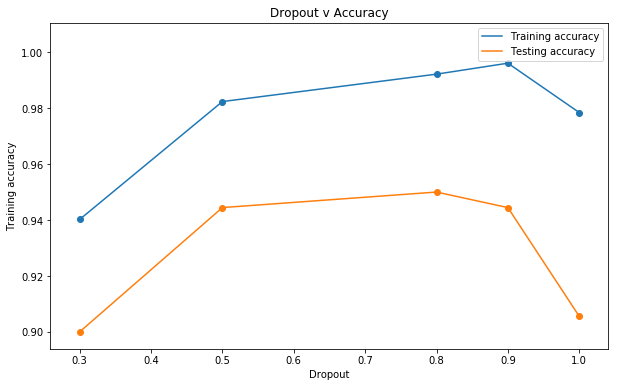

In [20]:
train = []
test = []
keys = []
plt.figure(figsize=(10,6))
plt.xlabel('Dropout')
plt.ylabel('Training accuracy')
plt.title("Dropout v Accuracy")
for key, value in plot_object.items():
    keys.append(key)
    train.append(plot_object[key]['train_accuracy'])
    test.append(plot_object[key]['test_accuracy'])
plt.scatter(keys,train)
plt.scatter(keys,test)
plt.plot(keys,train,label='Training accuracy')
plt.plot(keys,test,label='Testing accuracy')
plt.legend()
plt.show()

### Cost vs Iterations

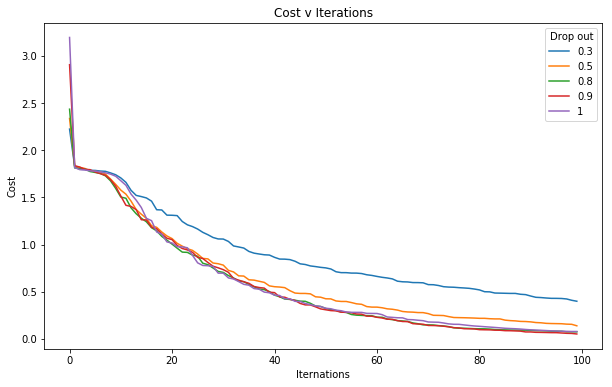

In [22]:
plt.figure(figsize=(10,6))
plt.xlabel('Iternations')
plt.ylabel('Cost')
plt.title("Cost v Iterations")
for key,value in plot_object.items():
    plt.plot(range(0,len(plot_object[key]['costs'])),sorted(plot_object[key]['costs'],reverse=True),label='drop out' + str(key))
plt.legend(dropout_probabilities,title="Drop out")